<a href="https://colab.research.google.com/github/Tiwari666/Anatomy_of_Deep_Learning/blob/main/Deep_Learning_ANN_Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# **Step 1: Import Dataset**

In [3]:
path = '/content/Churn_Modelling.csv'
df = pd.read_csv(path)

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


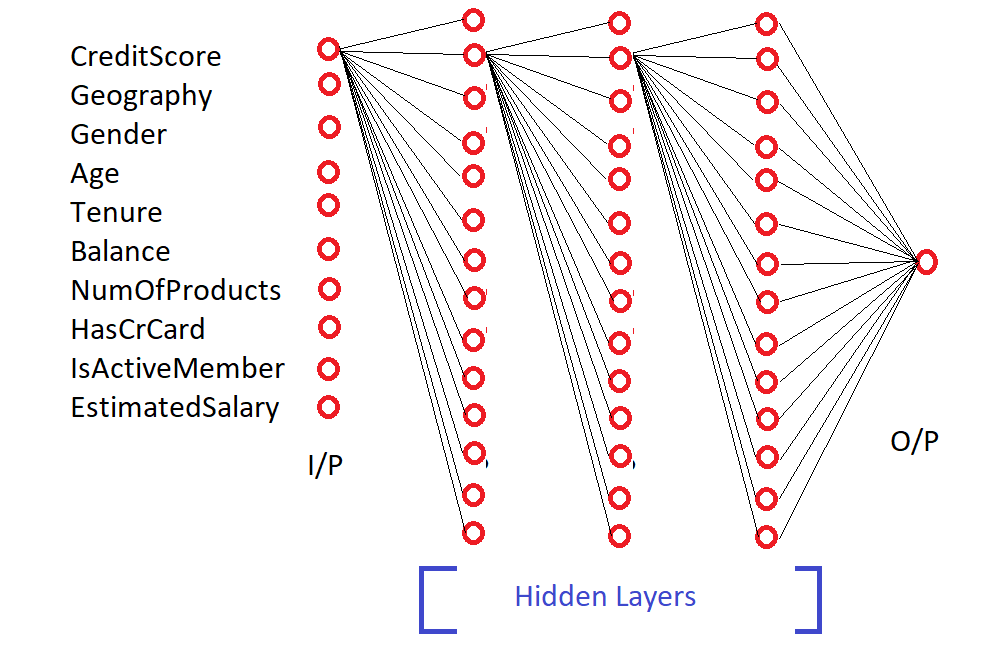

In [5]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [6]:
# Make a copy of the original DataFrame
df_original = df.copy()

In [7]:
# Drop unnecessary columns from the copy
df = df_original.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# **Step 2: Data Prepreprocessing:**

In [8]:
# Define the features (X) and the target (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [9]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

#**Label Encoding the "Gender" column**

Label Encoding:

Usage:

Ordinal Data: When categorical data has an inherent order or ranking among its values (e.g., "low", "medium", "high").

Binary Data: When dealing with binary categorical variables (e.g., "yes" or "no").

In [10]:
# Check the subcategories (unique values) in the gender column
gender_subcategories = df['Gender'].unique()
print(gender_subcategories)

['Female' 'Male']


--------------------------------

#**OneHotEncoder on "Geography" column**

One-Hot Encoding:

Usage:

Nominal Data: When the categorical values do not have any inherent order (e.g., country names, types of cars).

---ColumnTransformer is used to apply OneHotEncoder to both the Geography and Gender columns and StandardScaler to numerical columns such as CreditScore, Age, Tenure, Balance, NumOfProducts, and EstimatedSalary.

--set remainder='passthrough' is used to keep the rest of the columns unchanged.

--However, the above code snippet  only applies the OneHotEncoder to a single column (the second column, indexed as 1). It does not apply transformations to other categorical or numerical columns.

--------------------------

In [11]:
# Define the ColumnTransformer to apply OneHotEncoder to Geography and Gender, and StandardScaler to numerical columns
ct = ColumnTransformer(
    transformers=[
        ('geo_gender', OneHotEncoder(), [1, 2]),  # One-hot encode the Geography and Gender columns
        ('num', StandardScaler(), [0, 3, 4, 5, 6, 7, 8, 9])  # Standardize numerical columns
    ],
    remainder='passthrough'  # Keep the rest of the columns unchanged
)

In [12]:
# Fit and transform the training data
X = np.array(ct.fit_transform(X))

In [302]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  0.64609167,
         0.97024255,  0.02188649],
       [ 0.        ,  0.        ,  1.        , ..., -1.54776799,
         0.97024255,  0.21653375],
       [ 1.        ,  0.        ,  0.        , ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 0.        ,  1.        ,  0.        , ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.        ,  0.        ,  0.        , ...,  0.64609167,
        -1.03067011, -1.07636976]])

#**Splitting the dataset into the Training set and Test set**

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Artificial Neural Network**

# **Step 3: Building ANN Model**

#**Initialization of ANN**

In [14]:
# Initialize the ANN
model = Sequential()

#**Adding First Hidden Layer**

--Successively, we keep on decreasing the number of neurons/nodes on each additional hidden layers (e.g., units = 6,6,1) and keep units = 1 always for the output layer.

--Generally, the numbers are chosen in the multiple of 2s.

In [305]:
model.add(Dense(units=6, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# **Adding Second Hidden Layer**

In [15]:
model.add(Dense(units=6, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# **Add output layer**

In [16]:
# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# **Compile the ANN**


Compilation Step:

Configuration: Compiling sets up the necessary components (optimizer, loss function, models' metrics) that will guide the training process. This step configures the model and is a prerequisite for training.

Efficiency: By defining these components beforehand, the framework can optimize the training process.

Training Step:

Learning: Training is where the actual learning happens. The model iterates over the training data, adjusting its weights to learn the patterns in the data.

Validation: During training, you can also validate the model on a separate validation set to monitor its performance and avoid overfitting.

In [17]:
# Compile the ANN (set optimizer, loss function, and metrics)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [19]:
# Train the ANN
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping]) # ann = model

Epoch 1/50
200/200 [==============================] - 2s 4ms/step - loss: 0.8384 - accuracy: 0.5931 - val_loss: 0.6520 - val_accuracy: 0.7188
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.6359 - accuracy: 0.7094 - val_loss: 0.5341 - val_accuracy: 0.8106
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5643 - accuracy: 0.7673 - val_loss: 0.4910 - val_accuracy: 0.8087
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5294 - accuracy: 0.7834 - val_loss: 0.4717 - val_accuracy: 0.8119
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5108 - accuracy: 0.7937 - val_loss: 0.4596 - val_accuracy: 0.8094
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.7998 - val_loss: 0.4474 - val_accuracy: 0.8156
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4801 - accuracy: 0.7992 - val_loss: 0.4368 - val_accuracy: 0.8175
Epoch 

# **Plot training history**

In [21]:
import matplotlib.pyplot as plt

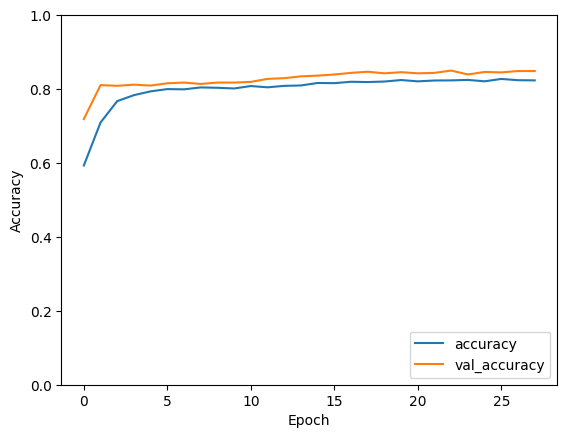

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# **Evaluate the Model**

In [24]:
loss_test, accuracy_test = model.evaluate(X_test, y_test)
loss_train, accuracy_train = model.evaluate(X_train, y_train)
loss_train, accuracy_train = model.evaluate(X_train, y_train)
print("Test Loss:", loss_test)
print("Test Accuracy:", accuracy_test)
print("Train Loss:", loss_train)
print("Train Accuracy:", accuracy_train)

250/250 [==============================] - 1s 3ms/step - loss: 0.3866 - accuracy: 0.8454
Test Loss: 0.378884881734848
Test Accuracy: 0.8514999747276306
Train Loss: 0.38659241795539856
Train Accuracy: 0.8453750014305115


Interpretation of the Accuracy Graph:

The above graph shows the training accuracy (accuracy) and validation accuracy (val_accuracy) over epochs.

Initial Training Phase (First Few Epochs):

Rapid Increase: The training accuracy quickly improves, indicating that the model is learning from the training data effectively in the early stages.
Validation Accuracy: The validation accuracy starts high and remains relatively stable, indicating that the model is generalizing well from the beginning.
Middle to Later Training Phase:

Stabilization: Both training and validation accuracies stabilize around a similar value. This suggests that the model has reached a point where it is not improving significantly with additional epochs.

Convergence: The fact that training and validation accuracies are closely aligned indicates that the model is not overfitting. If there were a significant gap between the two, it could indicate overfitting (training accuracy much higher than validation accuracy) or underfitting (both accuracies are low).

Conclusion

Good Model Fit: The graph suggests that the model is well-fitted. The accuracies are high and stable, with no significant divergence between training and validation performance.

Potential Best Model: Given the close match between training and validation accuracies and the high values achieved, this could indeed be a well-performing model for your dataset.


# **Next Steps**

Evaluate on Test Data: Ensure that the model performs well on a completely unseen test dataset to confirm its generalizability.

Additional Metrics: Check other metrics like precision, recall, F1-score, and AUC to get a comprehensive understanding of the model performance.

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [27]:
# Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

63/63 [==============================] - 0s 1ms/step
Confusion Matrix:
[[1589   18]
 [ 279  114]]


In [28]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1607
           1       0.86      0.29      0.43       393

    accuracy                           0.85      2000
   macro avg       0.86      0.64      0.67      2000
weighted avg       0.85      0.85      0.82      2000



In [29]:
# ROC Curve and AUC
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

63/63 [==============================] - 0s 1ms/step


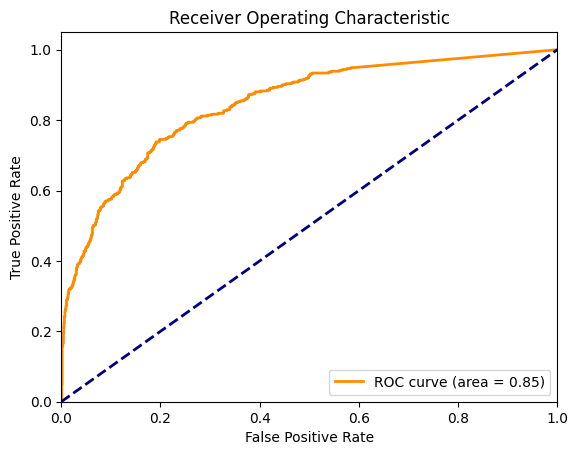

In [30]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **Prediction:**

Prediction on a new data sample after transforming it using the StandardScaler(sc) about whether the  Customer will leave the bank in the future.

The new data sample [[600, 'France', 'Female', 32, 3, 60000, 2, 1, 1, 50000]] includes features like the customer's credit score, age, balance, number of products, etc.


In [36]:
# Define the new data sample with pre-transformed values
new_data = [[600, 'France', 'Female', 3, 60000, 2, 1, 1, 50000, 1]]

# Apply the same transformations using ColumnTransformer
new_data_encoded = ct.transform(new_data)

# Make the prediction
result = model.predict(new_data_encoded)
print(result)
if result > 0.5:
    print("Customer will leave the bank in the future")
else:
    print("Customer will not leave the bank in the future")

1/1 [==============================] - 0s 44ms/step
[[0.10448035]]
Customer will not leave the bank in the future


# **INTERPRETATION of the Prediction:**

The output [[0.10448035]] represents the probability that the customer will leave the bank. In this case, the probability is approximately 0.104, which is below the threshold of 0.5. Therefore, the model predicts that the customer will not leave the bank in the future.

Detailed Interpretation:

Prediction Value:

The model outputs a probability of 0.10448035.
This probability indicates the likelihood that the customer will leave the bank.

Threshold Comparison:

The threshold for deciding if the customer will leave is set at 0.5.
Since 0.10448035 is less than 0.5, the model predicts False (i.e., the customer will not leave).

Conclusion:

Based on the model's prediction, the probability of the customer leaving the bank is approximately 10.4%.
This low probability suggests that the customer is likely to stay with the bank.

In [37]:
df.head(3)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
